<a href="https://colab.research.google.com/github/abeliansw/minGPT/blob/master/Colab_Code_Llama_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Colab Code Llama*
---

**Colab Code Llama**
A Coding Assistant built on Code Llama.

Copyright © 2023 Trelis LTD. MIT License.

**Colab Code Llama PRO**
- Upload chats and documents.
- Save/re-load chats.
- Get access for €4.99 ($5.49) [here](https://buy.stripe.com/cN24h2f4pa9ZbQY6oB).

Copyright © 2023 Trelis LTD. Commercial License.

Find Trelis on [HuggingFace](https://huggingface.co/Trelis) and [YouTube](https://www.youtube.com/@TrelisResearch) - for videos on fine-tuning!

## Setup and Installation

- You can run Colab Code Llama on a free Google Colab Notebook.
- Save a copy of this notebook: Go to File -> Save a copy in Drive. (optional, but needed if you want to make changes).
- Go to the menu -> Runtime -> Change Runtime Type - Select GPU (T4).
- Then go to Runtime -> Run all.
- It takes about 2 mins for the installation (which all happens in the cloud in this notebook).
- Once all cells have run, you'll find the chat interface at the bottom.

All of your data remains within your Google Drive and Google's computers.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

In [3]:
!pip install -U portalocker>=2.0.0`

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [7]:
pip install torchtext

In [5]:
# print first n examples
def print_first_n_items(dp, n = 1):
    counter = 0
    for d in dp:
        if counter>=n:
            break
        print(d)
        counter+=1


In [9]:
pip install konlpy

In [10]:
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다")
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [11]:
word2index = {}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [12]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector

In [13]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

In [14]:
import torch

In [15]:
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

In [ ]:
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

In [17]:
!pip install glove_python

  Using cached glove_python-0.1.0.tar.gz (263 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove_python
  Running setup.py clean for glove_python
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for glove_python
Failed to build glove_python
ERROR: Could not build wheels for glove_python, which is required to install pyproject.toml-based projects


In [19]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'how': 2, 'know': 3, 'you': 4, 'to': 5, 'code': 6, 'need': 7, '<unk>': 0, '<pad>': 1}


In [20]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성.
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])

In [21]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
  try:
    idxes.append(vocab[word])
  # 단어 집합에 없는 단어일 경우 <unk>로 대체된다.
  except KeyError:
    idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)

# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.2000, 0.1000, 0.8000],
        [0.6000, 0.1000, 0.1000],
        [0.4000, 0.1000, 0.1000],
        [0.0000, 0.0000, 0.0000]])


In [22]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [23]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=3,
                               padding_idx=1)

In [24]:
print(embedding_layer.weight)

Parameter containing:
tensor([[-0.3621, -1.6808, -1.0681],
        [ 0.0000,  0.0000,  0.0000],
        [-0.4418,  0.4569, -0.8661],
        [ 0.7685, -0.8132,  0.8817],
        [ 0.5372,  0.6151,  1.2822],
        [ 0.1637, -1.9155,  0.0784],
        [-0.8563,  0.0137, -0.0330],
        [ 0.4392, -0.0888,  1.7095]], requires_grad=True)


In [25]:
?nn.Embedding

In [26]:
from torchtext import data, datasets

ImportError: ignored

In [28]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [29]:
hidden_state_t.shape

(8,)

In [30]:
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [32]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [33]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.92802258 0.9869752  0.97128023 0.99486351 0.96868849 0.91859234
  0.99213916 0.99901449]
 [0.99996869 0.99999739 0.99986726 0.99999044 0.99960982 0.99986803
  0.99999503 0.99999935]
 [0.99993575 0.99999654 0.99983155 0.99998941 0.99911637 0.99984936
  0.9999843  0.99999829]
 [0.99995437 0.99999304 0.99974576 0.99997143 0.99933307 0.99980417
  0.99998717 0.99999786]
 [0.99998519 0.99999252 0.99986053 0.99998257 0.99949442 0.99983263
  0.99999518 0.99999908]
 [0.99992625 0.99999331 0.99983518 0.99997497 0.9981187  0.99971978
  0.99995807 0.99999754]
 [0.99997919 0.99999648 0.99989389 0.99999391 0.9994688  0.99988749
  0.99999539 0.99999923]
 [0.99997394 0.99999423 0.99992525 0.99999238 0.99829609 0.99981199
  0.99998491 0.99999888]
 [0.99999427 0.99999815 0.99994444 0.99999738 0.99981833 0.9999313
  0.99999919 0.99999984]
 [0.99996942 0.99997728 0.99971657 0.99995537 0.99880292 0.99974337
  0.99998435 0.99999541]]

In [34]:
import torch
import torch.nn as nn

In [35]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

In [36]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [37]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [38]:
outputs, _status = cell(inputs)

In [39]:
outputs

tensor([[[ 1., -1.,  1.,  1., -1.,  1., -1.,  1.],
         [-1., -1.,  1., -1., -1.,  1.,  1., -1.],
         [-1.,  1., -1., -1., -1.,  1., -1., -1.],
         [-1., -1.,  1., -1., -1.,  1.,  1., -1.],
         [-1.,  1., -1., -1., -1.,  1., -1., -1.],
         [ 1., -1.,  1., -1., -1., -1., -1., -1.],
         [ 1., -1., -1.,  1., -1.,  1., -1.,  1.],
         [-1.,  1.,  1., -1., -1.,  1.,  1.,  1.],
         [-1.,  1., -1., -1., -1.,  1., -1., -1.],
         [ 1., -1.,  1., -1., -1., -1., -1., -1.]]],
       grad_fn=<TransposeBackward1>)

In [44]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [45]:
print(_status.shape)

torch.Size([1, 1, 8])


In [46]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [47]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

In [48]:
outputs, _status = cell(inputs)

In [49]:
print(outputs.shape)

torch.Size([1, 10, 8])


In [50]:
print(_status.shape)

torch.Size([2, 1, 8])


In [51]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [52]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [54]:
outputs, _status = cell(inputs)

In [55]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])


In [ ]:
torch.Size([1, 10, 16])

In [56]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


In [9]:
!pip install nltk

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [12]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [13]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


In [14]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [15]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


In [16]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [18]:
sample_data = data[:100] # 임의로 100개만 저장

In [19]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

<ipython-input-19-2131f05301ae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-19-2131f05301ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [20]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [21]:
tokenizer = Mecab()
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [22]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [23]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


In [24]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [25]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [26]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [27]:
print(encoded[:10])


[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3], [124, 37, 221, 42, 80, 37], [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


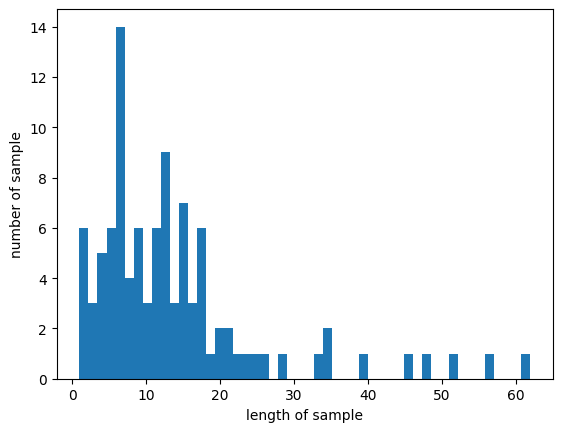

In [28]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [29]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [30]:
[word_to_index['pad']]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [31]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000


In [33]:
 max(len(l) for l in encoded)

62

In [34]:
print(encoded[:3])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [35]:
import urllib.request
import pandas as pd

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7e558272fee0>)

In [37]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [38]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


In [39]:
train_df = df[:25000]
test_df = df[25000:]

In [40]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [41]:
train_df.to_csv("/content/drive/MyDrive/test/train_data.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/test/test_data.csv", index=False)

In [42]:
from torchtext.legacy import data # torchtext.data 임포트

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

ModuleNotFoundError: ignored

In [ ]:
# Configuration
runtimeFlag = "cuda:0" #Run on GPU (you can't run GPTQ on cpu)
cache_dir = None # by default, don't set a cache directory. This is automatically updated if you connect Google Drive.
scaling_factor = 1.0 # allows for a max sequence length of 16384*6 = 98304! Unfortunately, requires Colab Pro and a V100 or A100 to have sufficient RAM.

In [ ]:
# Set the SYSTEM PROMPT
DEFAULT_SYSTEM_PROMPT = 'You are a helpful pair-coding assistant.'
SYSTEM_PROMPT = DEFAULT_SYSTEM_PROMPT

print(SYSTEM_PROMPT)

You are a helpful pair-coding assistant.


### Google Drive Mounting (optional)
- Allows you to download the model to Google Drive for faster startup next time.

In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## Allow the model to be saved to Google Drive for faster startup next time

# # This is the path to the Google Drive folder.
# drive_path = "/content/drive"

# # This is the path where you want to store your cache.
# cache_dir_path = os.path.join(drive_path, "My Drive/huggingface_cache")

# # Check if the Google Drive folder exists. If it does, use it as the cache_dir.
# # If not, set cache_dir to None to use the default Hugging Face cache location.
# if os.path.exists(drive_path):
#     cache_dir = cache_dir_path
#     os.makedirs(cache_dir, exist_ok=True) # Ensure the directory exists
# else:
#     cache_dir = None

# print(cache_dir)

## Install

In [ ]:
!pip install -q -U transformers peft accelerate optimum

!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q -U pdfminer.six # could maybe add pre-built wheels to speed this up.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.7 MB/s eta 0:00:00


In [ ]:
# https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

### Import

In [ ]:
import transformers
import torch
import json
import os
from transformers import AutoTokenizer, TextStreamer

## Load Model
If you have connected to Google Drive, the model will load from there (unless this is your first time connecting, in which case the model will be saved to Drive).
- Takes about 2 mins first time around.
- Takes about 1 min the 2nd time onwards with Google Drive.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    # rope_scaling = {"type": "dynamic", "factor": scaling_factor}
    )
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
print(model.config.max_position_embeddings)

16384


In [ ]:
print(model.config)

LlamaConfig {
  "_name_or_path": "TheBloke/CodeLlama-13B-Instruct-GPTQ",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "auto_map": {
    "AutoConfig": "TheBloke/CodeLlama-13B-Instruct-GPTQ--configuration_llama.LlamaConfig",
    "AutoModel": "TheBloke/CodeLlama-13B-Instruct-GPTQ--modeling_llama.LlamaModel",
    "AutoModelForCausalLM": "TheBloke/CodeLlama-13B-Instruct-GPTQ--modeling_llama.LlamaForCausalLM",
    "AutoModelForSequenceClassification": "TheBloke/CodeLlama-13B-Instruct-GPTQ--modeling_llama.LlamaForSequenceClassification"
  },
  "bos_token_id": 1,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hidden_size": 5120,
  "initializer_range": 0.02,
  "intermediate_size": 13824,
  "max_position_embeddings": 16384,
  "model_type": "llama",
  "num_attention_heads": 40,
  "num_hidden_layers": 40,
  "num_key_value_heads": 40,
  "pad_token_id": 0,
  "pretraining_tp": 1,
  "quantization_config": {
    "batch_size": 1,
    "bits": 4,
    "block_name_to_quantize": null,
    "damp_percen

## Set up the User Interface

In [ ]:
from IPython.display import display, HTML, clear_output, Markdown
import textwrap, json
import ipywidgets as widgets
import re, time
from google.colab import files
from pdfminer.high_level import extract_text
import io

In [ ]:
B_INST, E_INST = "[INST]", "[/INST]"
B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n\n"

# max_doc_length = 50
max_context = int(model.config.max_position_embeddings*scaling_factor)
max_doc_length = int(0.75 * max_context)  # max doc length is 75% of the context length
max_doc_words = int(max_doc_length)

In [ ]:
def generate_response(dialogs, temperature=0.01, top_p=0.9, logprobs=False):
    torch.cuda.empty_cache()
    # print(json.dumps(dialogs, indent=4))
    max_prompt_len = int(0.85 * max_context)
    max_gen_len = int(0.10 * max_prompt_len)

    prompt_tokens = []
    for dialog in dialogs:
        if dialog[0]["role"] != "system":
            dialog = [
                {
                    "role": "system",
                    "content": SYSTEM_PROMPT,
                }
            ] + dialog
        dialog_tokens = [tokenizer(
            f"{B_INST} {B_SYS}{(dialog[0]['content']).strip()}{E_SYS}{(dialog[1]['content']).strip()} {E_INST}",
            # f"{B_INST} {(dialog[1]['content']).strip()} {E_INST}", # Omits the system prompt altogether
            return_tensors="pt",
            add_special_tokens=True
        ).input_ids.to(runtimeFlag)]
        for i in range(2, len(dialog), 2):
            user_tokens = tokenizer(
                f"{B_INST} {(dialog[i+1]['content']).strip()} {E_INST}",
                return_tensors="pt",
                add_special_tokens=True
            ).input_ids.to(runtimeFlag)
            assistant_w_eos = dialog[i]['content'].strip() + tokenizer.eos_token
            assistant_tokens = tokenizer(
                            assistant_w_eos,
                            return_tensors="pt",
                            add_special_tokens=False
                        ).input_ids.to(runtimeFlag)
            tokens = torch.cat([assistant_tokens, user_tokens], dim=-1)
            dialog_tokens.append(tokens)
        prompt_tokens.append(torch.cat(dialog_tokens, dim=-1))

    input_ids = prompt_tokens[0]
    if len(input_ids[0]) > max_prompt_len:
        return "\n\n **The language model's input limit has been reached. Clear the chat and start afresh!**"

    # print(tokenizer.decode(input_ids[0], skip_special_tokens=True))

    generation_output = model.generate(
        input_ids=input_ids,
        do_sample=True,
        max_new_tokens=max_gen_len,
        temperature=temperature,
        top_p=top_p,
    );

    new_tokens = generation_output[0][input_ids.shape[-1]:]
    new_assistant_response = tokenizer.decode(new_tokens, skip_special_tokens=True).strip();

    return new_assistant_response

In [ ]:
def print_wrapped(text):
    # Regular expression pattern to detect code blocks
    code_pattern = r'```(.+?)```'
    matches = list(re.finditer(code_pattern, text, re.DOTALL))

    if not matches:
        # If there are no code blocks, display the entire text as Markdown
        display(Markdown(text))
        return

    start = 0
    for match in matches:
        # Display the text before the code block as Markdown
        before_code = text[start:match.start()].strip()
        if before_code:
            display(Markdown(before_code))

        # Display the code block
        code = match.group(0).strip()  # Extract code block
        display(Markdown(code))  # Display code block

        start = match.end()

    # Display the text after the last code block as Markdown
    after_code = text[start:].strip()  # Text after the last code block
    if after_code:
        display(Markdown(after_code))

dialog_history = [{"role": "system", "content": SYSTEM_PROMPT}]

button = widgets.Button(description="Send")
upload_button = widgets.Button(description="Upload .txt or .pdf")
text = widgets.Textarea(layout=widgets.Layout(width='800px'))

output_log = widgets.Output()

def on_button_clicked(b):
    user_input = text.value
    dialog_history.append({"role": "user", "content": user_input})

    text.value = ''

    # Change button description and color, and disable it
    button.description = 'Processing...'
    button.style.button_color = '#ff6e00'  # Use hex color codes for better color choices
    button.disabled = True  # Disable the button when processing

    with output_log:
        clear_output()
        for message in dialog_history:
            print_wrapped(f'**{message["role"].capitalize()}**: {message["content"]}\n')

    assistant_response = generate_response([dialog_history]);

    # Re-enable the button, reset description and color after processing
    button.description = 'Send'
    button.style.button_color = 'lightgray'
    button.disabled = False

    dialog_history.append({"role": "assistant", "content": assistant_response})

    with output_log:
        clear_output()
        for message in dialog_history:
            print_wrapped(f'**{message["role"].capitalize()}**: {message["content"]}\n')

button.on_click(on_button_clicked)

# Create an output widget for alerts
alert_out = widgets.Output()

clear_button = widgets.Button(description="Clear Chat")
text = widgets.Textarea(layout=widgets.Layout(width='800px'))

def on_clear_button_clicked(b):
    # Clear the dialog history
    dialog_history.clear()
    # Add back the initial system prompt
    dialog_history.append({"role": "system", "content": SYSTEM_PROMPT})
    # Clear the output log
    with output_log:
        clear_output()

clear_button.on_click(on_clear_button_clicked)

In [ ]:
from IPython.display import display, HTML
from ipywidgets import HBox, VBox

# Create the title with HTML
title = f"<h1 style='color: #ff6e00;'>Colab Code Llama 🦙</h1> <p>(Max context of: {max_context}. Uploaded files will be shortened to {max_doc_words} tokens)</p>"

# Assuming that output_log, alert_out, and text are other widgets or display elements...
first_row = HBox([button, clear_button])  # Arrange these buttons horizontally

# Arrange the two rows of buttons and other display elements vertically
layout = VBox([output_log, alert_out, text, first_row])

# Chat with Colab Code Llama

In [ ]:
display(HTML(title))  # Use HTML function to display the title
display(layout)

In [ ]:
def remove_spaces_and_punctuation2(input_string):
    output_string = ""
    for char in input_string:
        if char.isalnum():
            output_string += char
    return output_string

print(remove_spaces_and_punctuation2("Hello, World! 123"))

HelloWorld123


In [ ]:
def remove_spaces_and_punctuation(input_string):
    # Create an empty list to store the alphanumeric characters
    alphanumeric_chars = []

    # Iterate over each character in the input string
    for char in input_string:
        # Check if the character is a letter or a digit
        if ('A' <= char <= 'Z') or ('a' <= char <= 'z') or ('0' <= char <= '9'):
            # If it is, add it to the list of alphanumeric characters
            alphanumeric_chars.append(char)

    # Convert the list of alphanumeric characters back into a string
    modified_string = ''.join(alphanumeric_chars)

    return modified_string

# Test the function with an example string
print(remove_spaces_and_punctuation("Hello, World! 123"))

HelloWorld123


In [ ]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def sum_of_primes(start, end):
    prime_sum = 0
    for i in range(start, end + 1):
        if is_prime(i) and  "7" not in str(i):
            prime_sum += i
    return prime_sum

print(sum_of_primes(1000000, 2000000))

45772097654


In [ ]:
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i +=6
    return True

def no_seven(n):
    return '7' not in str(n)

sum_primes = sum(i for i in range(10**6, (2*10**6)+1) if is_prime(i) and no_seven(i))
print(sum_primes)

45772097654
